In [8]:
import os
from os import path
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from bs4 import BeautifulSoup
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import spacy

import re
import requests

nlp = spacy.load('en_core_web_sm')
stopwords = nltk.corpus.stopwords.words('english')
WNL = WordNetLemmatizer()


color_palettes = ['Accent', 'BrBG', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu_r', 'Greens', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'PuBuGn_r', 'PuRd', 'RdBu']
# , , , Blues_r, , BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [4]:
# 1. Word clouds data preparation.

def remove_url(text):
    return re.sub('https?://[A-Za-z0-9./]+','',text)
def html_strip_praser(text):
    return BeautifulSoup(text, "html.parser").get_text()
def html_strip_lxml(text):
    return BeautifulSoup(text, 'lxml').get_text()
def remove_special_characters(text, preserve):
    return re.sub("[^a-zA-Z{}]".format(preserve), " ", text)
def lowercase_text(text):
    return text.lower()
def strip_inner_spaces(text):
    return ' '.join([w.strip() for w in text.split()])
def remove_stop_words(text):
    return ' '.join([w for w in text.split() if not w in set(stopwords)])
def lemmatize_words(text, WNL):
    return ' '.join([WNL.lemmatize(word, pos='v') for word in text.split()])

def word_counts_text_cleaner(text):
    text = remove_url(text)
    #text = html_strip_lxml(text)
    text = remove_special_characters(text, preserve='-')
    text = lowercase_text(text)
    text = strip_inner_spaces(text)
    text = remove_stop_words(text)
    text = lemmatize_words(text, WNL)
    return text




# Load and concantate csv files by a category.
base_path = os.getcwd() + '/data/'

# Iterate over folders [categories].
folder_names = [f for f in os.listdir(base_path)]
topic_frames = []
for fn in folder_names:
    if not '.' in fn and not 'word_counts' in fn:
        
        # Iterate over csv files.
        file_names = [f for f in os.listdir(base_path+fn)]
        folder_frames = []
        for file in file_names:
            
            # Open each csv file.
            csv_file_path = base_path + fn + '/' + file
            df = pd.read_csv(csv_file_path, encoding='utf-8')
            folder_frames.append(df)
            
        # Concat csv files inside each of folders [categories].
        df_category = pd.concat(folder_frames, axis=0)
        topic_frames.append(df_category)
        print('Folder {} done, {} rows.'.format(fn, len(df_category)))

# Concat all csv fiels into one big dataframe of all categories.
df_all = pd.concat(topic_frames, axis=0)
print('All data df done, shaoe {}.'.format(df_all.shape))


Folder Cognitivism done, 5255 rows.
Folder Big_Five done, 13229 rows.
Folder Comperative done, 6748 rows.
Folder Biological done, 6901 rows.
Folder Evolutionary done, 25220 rows.
Folder Mathematical done, 9213 rows.
Folder Experimental done, 17777 rows.
Folder Social done, 27420 rows.
Folder Quantitative done, 12794 rows.
Folder Cross-cultural done, 3617 rows.
Folder Behavioral_genetics done, 23221 rows.
Folder Personality done, 19029 rows.
Folder Differential done, 6408 rows.
Folder Cognitive done, 14498 rows.
Folder Positive done, 7699 rows.
Folder Cultural done, 4460 rows.
Folder Neuropsychology done, 7239 rows.
Folder Developmental done, 24490 rows.
All data df done, shaoe (235218, 4).


Cognitivism


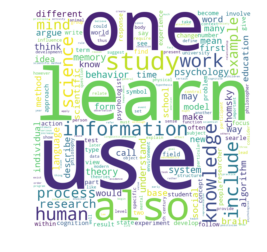

Big Five


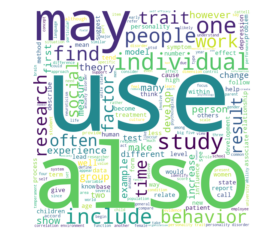

Comperative


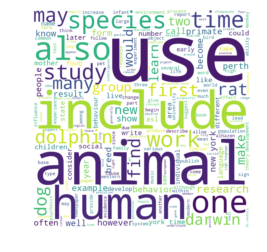

Biological


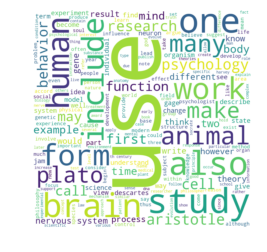

Evolutionary


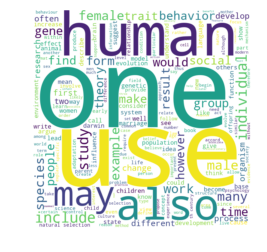

Mathematical


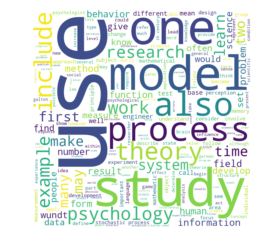

Experimental


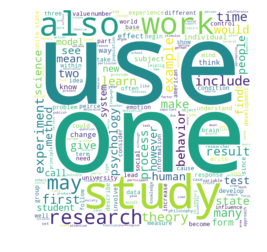

Social


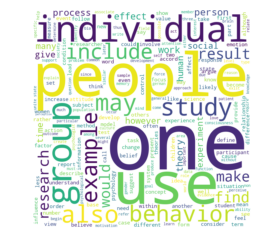

Quantitative


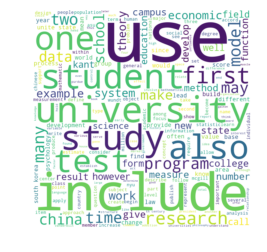

Cross-cultural


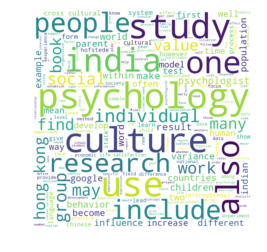

Behavioral genetics


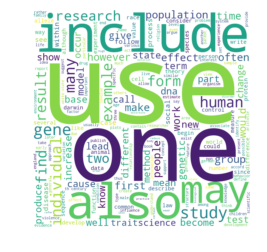

Personality


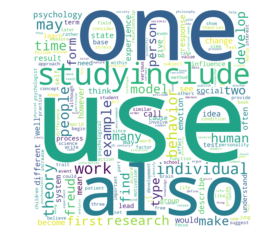

Differential


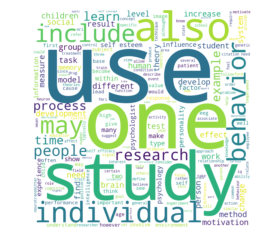

Cognitive


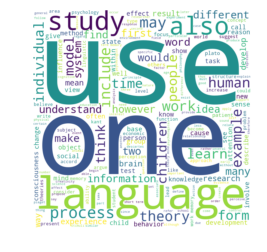

Positive


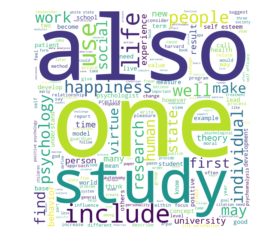

Cultural


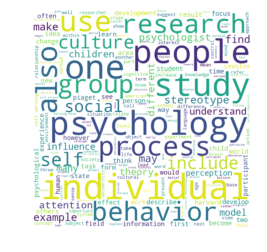

Neuropsychology


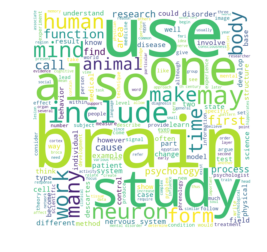

Developmental


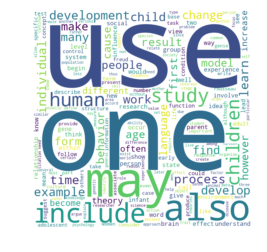

In [6]:
# 2. Word clouds: Top words / category 

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt

for i in range(len(topic_frames)):
    wcl_text = ' '.join(topic_frames[i].sentence.apply(word_counts_text_cleaner).to_list())

    # Generate a word cloud image
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(wcl_text)
    
    category = topic_frames[i].source.any()
    print(category)
    
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.close()

Display word cloud of ADJ for each category.
Cognitivism


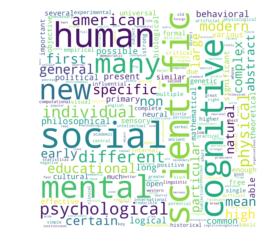

Big Five


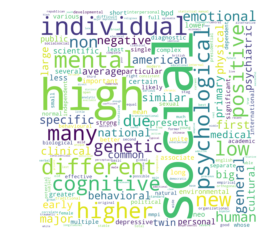

Comperative


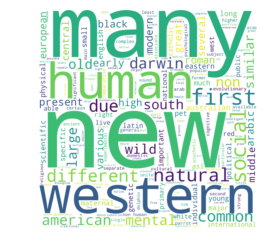

Biological


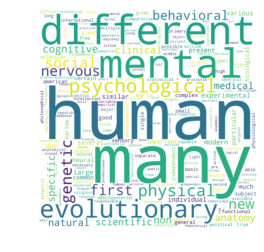

Evolutionary


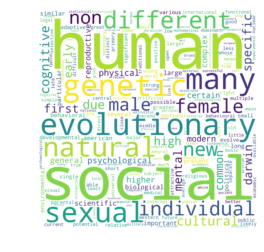

Mathematical


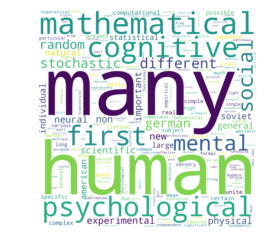

Experimental


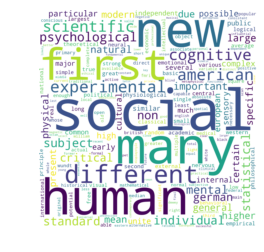

Social


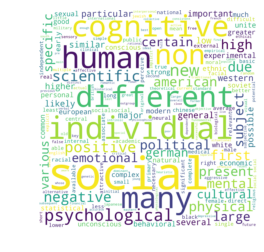

Quantitative


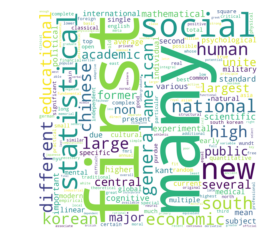

Cross-cultural


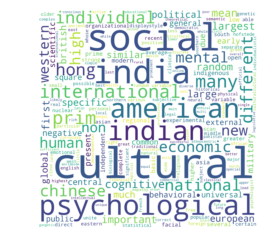

Behavioral genetics


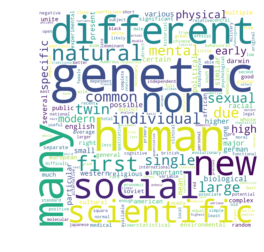

Personality


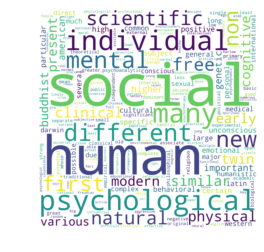

Differential


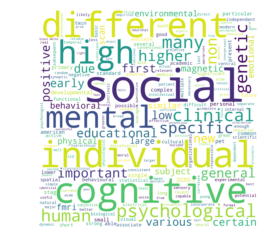

Cognitive


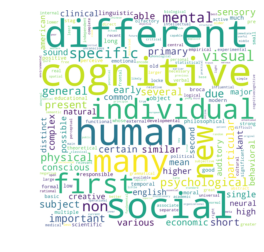

Positive


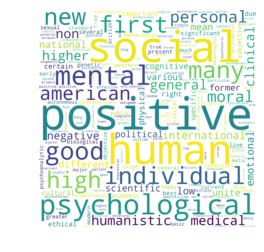

Cultural


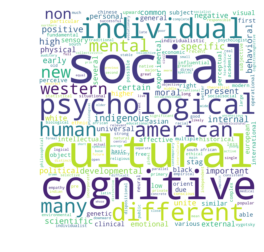

Neuropsychology


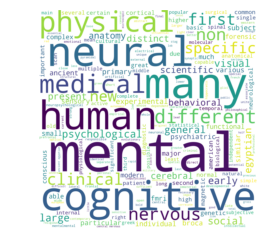

Developmental


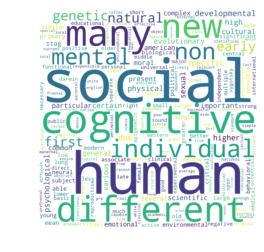

<Figure size 432x288 with 0 Axes>

In [7]:
# 3. Word clouds: Top words / category of picked POS only. 

# Takes long (requires separate POS filtering), other parts are not so slow.



pos = 'ADJ'




print('Display word cloud of {} for each category.'.format(pos))
for i in range(len(topic_frames)):
    
    df = topic_frames[i]
    
    pos_string = ''
    text_sentences = df.sentence.to_list()
    for ts in text_sentences:
        
        ts = word_counts_text_cleaner(ts)
        
        try:
            pos_string += ' '.join([w.text for w in nlp(ts) if w.pos_ == pos  ])
        except Exception as e:
            print(e)
            
            
    wordcloud = WordCloud(width = 1800, height = 1800, 
                    #mask=picture_mask,
                    background_color ='white', 
                    stopwords = stopwords, 
                    # ", mode="RGBA",
                    min_font_size = 10).generate(pos_string)
    
    category = topic_frames[i].source.any()
    print(category)
    
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("test_wcl_{}".format(i), format="png")